In [45]:
# load the package
include("../FractionalFlow/FractionalFlow.jl")
using PyPlot, SetPyPlot, NLopt, Dierckx
import Calculus
import GR
FF = FractionalFlow

FractionalFlow

# Low sal test including pressure drop data

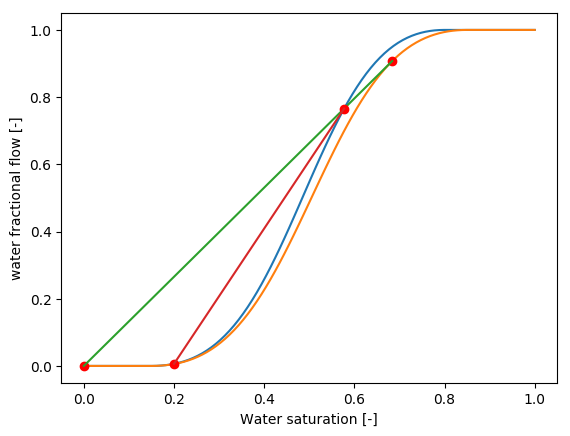

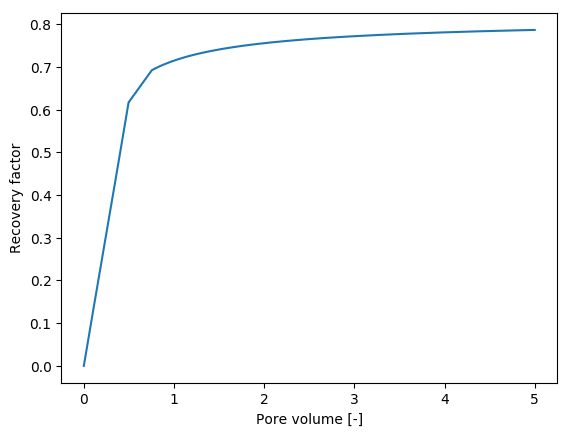

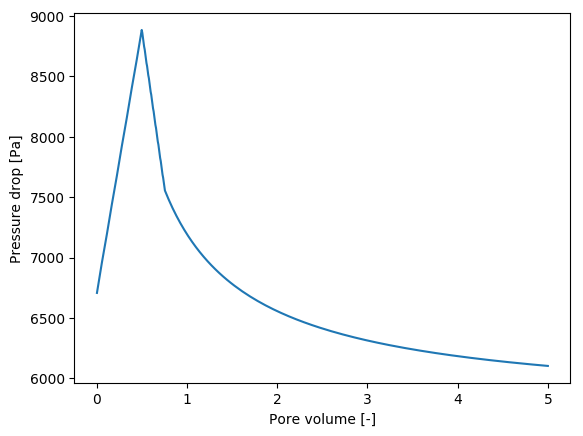

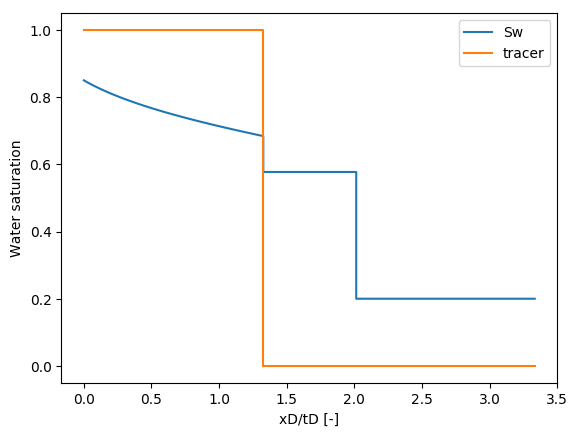

PyObject <matplotlib.legend.Legend object at 0x7f7378f25210>

In [46]:
fluids_hs = FF.oil_water_fluids(mu_water=1.5e-3, mu_oil=3e-3)
fluids_ls = FF.oil_water_fluids(mu_water=1e-3, mu_oil=3e-3)
rel_perms_hs = FF.oil_water_rel_perms(krw0=0.4, kro0=0.9, 
        swc=0.15, sor=0.2, nw=2.0, no = 2.0)
rel_perms_ls = FF.oil_water_rel_perms(krw0=0.3, kro0=0.95, 
        swc=0.15, sor=0.15, nw=2.0, no = 2.0)
core_flood = FF.core_flooding(u_inj=1.15e-5, pv_inject=5.0, p_back=1e5, sw_init=0.2, sw_inj=1.0, rel_perms=rel_perms_hs)
core_props = FF.core_properties()
ls_res = FF.low_sal_water_flood(core_props, fluids_ls, fluids_hs, rel_perms_hs, 
        rel_perms_ls, core_flood)
FF.visualize(ls_res)

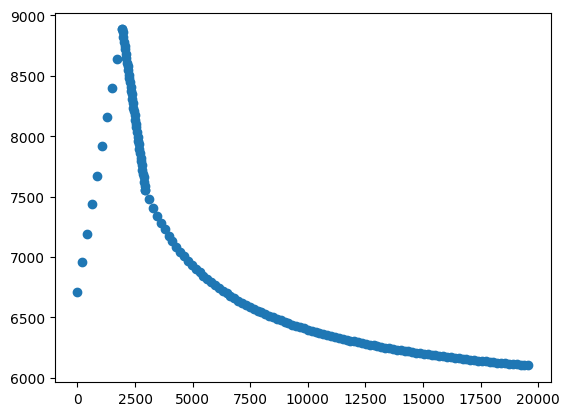

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7391bcdcd0>

In [47]:
plot(ls_res.dp_time[:,1], ls_res.dp_time[:,2], "o")

# Tertiary flood

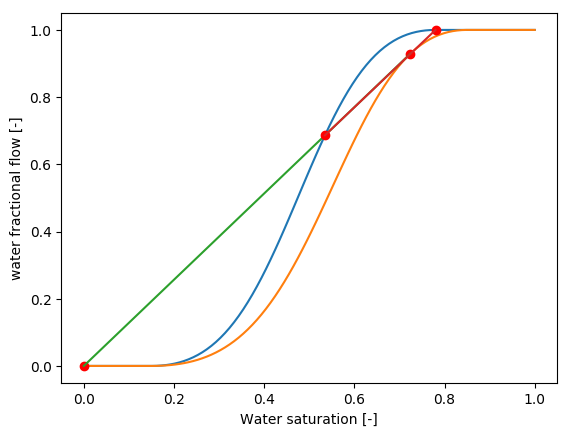

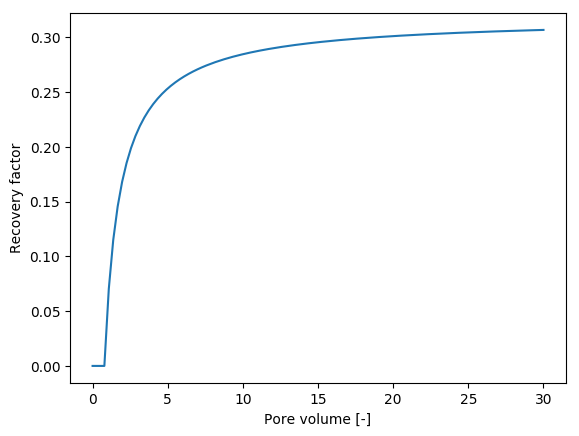

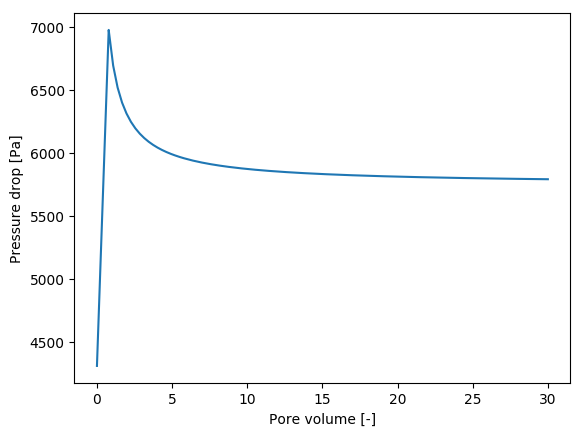

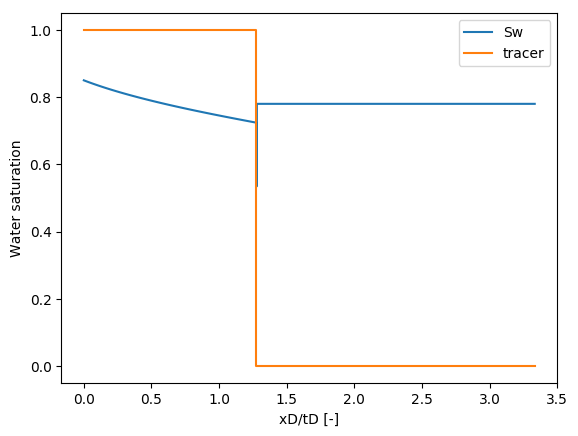

INFO: Using the single_ion_adsorption_water_flood function.


PyObject <matplotlib.legend.Legend object at 0x7f7391da1ad0>

In [48]:
sor_hs = 0.22
sw_init = 1-sor_hs
fluids_hs = FF.oil_water_fluids(mu_water=1e-3, mu_oil=2e-3)
fluids_ls = FF.oil_water_fluids(mu_water=1e-3, mu_oil=2e-3)
rel_perms_hs = FF.oil_water_rel_perms(krw0=0.4, kro0=0.9, 
        swc=0.15, sor=sor_hs, nw=2.0, no = 2.0)
rel_perms_ls = FF.oil_water_rel_perms(krw0=0.3, kro0=0.95, 
        swc=0.15, sor=0.15, nw=2.0, no = 2.0)
core_flood = FF.core_flooding(u_inj=1.15e-5, pv_inject=30.0, p_back=1e5, sw_init=sw_init, 
    sw_inj=1.0, rel_perms=rel_perms_hs)
core_props = FF.core_properties()
ls_res = FF.single_ion_adsorption_water_flood_single_shock(core_props, fluids_ls, fluids_hs, rel_perms_hs, 
        rel_perms_ls, core_flood, 0.0)
FF.visualize(ls_res)

In [49]:
ls_res.recovery_pv[:,2][13]

0.0

In [50]:
# t_sec, pv_num, rec_fact, xt_num, sw_num, c_old, c_out_sal = 
#     FF.forced_imb_implicit_upwind(core_props, fluids_ls, fluids_hs, rel_perms_hs, 
#         rel_perms_ls, core_flood, pv_inj = core_flood.injected_pore_volume)
# figure(2)
# plot(xt_num/(core_props.length)/pv_num[end], sw_num)
# plot(xt_num/(core_props.length)/pv_num[end], c_old)
# plot(ls_res.saturation_profile_xt[:,1], ls_res.saturation_profile_xt[:,2])
# plot(ls_res.tracer_profile_xt[:,1], ls_res.tracer_profile_xt[:,2])
# xlabel("x/t [-]")
# ylabel("Water saturation [-]")

In [51]:
# figure(2)
# plot(xt_num/(core_props.length)/pv_num[end], sw_num)
# plot(ls_res.saturation_profile_xt[:,1], ls_res.saturation_profile_xt[:,2])

In [52]:
# plot(t_sec, rec_fact)
# plot(ls_res.recovery_time[:,1], ls_res.recovery_time[:,2])